<a href="https://colab.research.google.com/github/ardiann-eng/TUGAS2SMA/blob/main/Clean_Data_Analisit_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and Processing
This notebook performs cleaning and shortening of tweet data about Purbaya mining activities.

In [3]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

In [4]:
# Load the data
df = pd.read_csv('purbaya.csv')

In [5]:
# Initial data inspection
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head(20)

Dataset shape: (860, 15)

First few rows:


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1970788081298288645,Wed Sep 24 09:51:08 +0000 2025,0,Gara-gara Menteri Purbaya investasi depositony...,1970788081298288645,https://pbs.twimg.com/amplify_video_thumb/1970...,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197078808129828...,1838831338843197440,NaN
1,1970788045638050263,Wed Sep 24 09:51:00 +0000 2025,0,Klaim Rp. 10.000 saldo pas download apk Shopee...,1970788045638050263,https://pbs.twimg.com/media/G1mSOFCaQAAIm6z.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197078804563805...,1884735513976004608,NaN
2,1970787294908150000,Wed Sep 24 09:48:01 +0000 2025,0,Sobat Essentials! Menteri Keuangan Purbaya mem...,1970787294908150000,https://pbs.twimg.com/media/G1mkftob0AEHwMs.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/197078729490815...,72763910,NaN
3,1970786086101373350,Wed Sep 24 09:43:13 +0000 2025,0,Keknya emang rindu pejabat pinter ngomong (ber...,1970786086101373350,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197078608610137...,59319789,NaN
4,1970785957248188546,Wed Sep 24 09:42:42 +0000 2025,0,Menteri Keuangan Purbaya Yudhi Sadewa menegask...,1970785957248188546,https://pbs.twimg.com/media/G1mjVk_bYAARhPu.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197078595724818...,48359478,NaN
5,1970785595015483672,Wed Sep 24 09:41:15 +0000 2025,0,Menteri Keuangan Purbaya Yudhi Sadewa dibuat t...,1970785595015483672,https://pbs.twimg.com/media/G1mjDF_a4AA9g94.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197078559501548...,2895296804,NaN
6,1970785356397138369,Wed Sep 24 09:40:24 +0000 2025,0,Baca selengkapnya di sini: https://t.co/nVAyS...,1970785379919036584,NaN,InvestorID,in,NaN,0,0,0,https://x.com/undefined/status/197078537991903...,238091066,NaN
7,1970785356397138369,Wed Sep 24 09:40:22 +0000 2025,0,Tantangan tetap ada: mayoritas 58% tenaga kerj...,1970785371178111318,NaN,InvestorID,in,NaN,0,1,0,https://x.com/undefined/status/197078537117811...,238091066,NaN
8,1970785356397138369,Wed Sep 24 09:40:20 +0000 2025,0,Purbaya optimis target 8% itu realistis mengin...,1970785364404236634,NaN,InvestorID,in,NaN,0,1,0,https://x.com/undefined/status/197078536440423...,238091066,NaN
9,1970785356397138369,Wed Sep 24 09:40:19 +0000 2025,0,Menkeu Purbaya perkenalkan Sumitronomics waris...,1970785359702429941,NaN,InvestorID,in,NaN,0,1,0,https://x.com/undefined/status/197078535970242...,238091066,NaN


# Data Cleaning

In [6]:
# Convert created_at to datetime
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S %z %Y')

In [7]:
# Clean text data
def clean_text(text):
    if pd.isna(text):
        return text
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join(text.split())
    text = text.replace('&amp;', 'dan')
    return text.lower()
df['cleaned_text'] = df['full_text'].apply(clean_text)

In [8]:
# Extract hashtags
def extract_hashtags(text):
    if pd.isna(text):
        return []
    return re.findall(r'#(\w+)', text)
df['hashtags'] = df['full_text'].apply(extract_hashtags)

In [9]:
# Handle missing values
df['in_reply_to_screen_name'].fillna('', inplace=True)
df['location'].fillna('', inplace=True)
df['image_url'].fillna('', inplace=True)

/tmp/ipython-input-3931258595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['in_reply_to_screen_name'].fillna('', inplace=True)
/tmp/ipython-input-3931258595.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

# Data Shortening and Filtering

In [10]:
# Filter for relevant columns
columns_to_keep = ['created_at', 'username', 'cleaned_text', 'hashtags',
                   'favorite_count', 'retweet_count', 'reply_count', 'quote_count',
                   'image_url', 'location', 'lang', 'tweet_url']
df_clean = df[columns_to_keep]

In [11]:
# Remove duplicate tweets (based on cleaned text)
df_clean = df_clean.drop_duplicates(subset=['cleaned_text'])

In [12]:
# Filter for tweets that mention key terms
keywords = ['purbaya', 'menkeu', 'menteri', 'keuangan', 'pajak', 'ekonomi', 'triliun', 'dpr', 'yudhi']
def contains_keywords(text):
    if pd.isna(text):
        return False
    return any(keyword in text for keyword in keywords)
df_filtered = df_clean[df_clean['cleaned_text'].apply(contains_keywords)]

In [13]:
# Sort by engagement (favorites + retweets)
df_filtered['engagement'] = df_filtered['favorite_count'] + df_filtered['retweet_count']
df_sorted = df_filtered.sort_values('engagement', ascending=False)

/tmp/ipython-input-3447588314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['engagement'] = df_filtered['favorite_count'] + df_filtered['retweet_count']


# Analisis Sentimen (Basic)

In [14]:
import pandas as pd
from transformers import pipeline

# 1. Load model sentimen Bahasa Indonesia
classifier = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")

# 2. Pastikan df_sorted dan kolom 'cleaned_text' ada
try:
    if 'df_sorted' in locals() and 'cleaned_text' in df_sorted.columns:
        # 3. Terapkan analisis sentimen otomatis
        def get_sentiment(text):
            if pd.isna(text) or text.strip() == "":
                return 'neutral'
            result = classifier(text[:512])[0]  # max token limit
            return result['label'].lower()  # 'positive', 'negative', 'neutral'

        df_sorted['sentiment'] = df_sorted['cleaned_text'].apply(get_sentiment)
        print(df_sorted[['cleaned_text', 'sentiment']])
    else:
        print("df_sorted dataframe or 'cleaned_text' column not found. Please ensure previous steps ran successfully.")

except Exception as e:
    print(f"Terjadi error saat menjalankan model sentimen: {e}")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


                                          cleaned_text sentiment
448  komunikasi publik seperti ini yang diperlukan ...  positive
836  sebenernya keduanya punya metode dan kebijakan...  positive
671  gayus tambunan bongkar 5 modus permainan pajak...   neutral
310  menkeu purbaya beri peringatan keras dan memin...   neutral
816  pada konpers apbn kita senin 22925 menteri keu...   neutral
..                                                 ...       ...
8    purbaya optimis target 8 itu realistis menging...   neutral
7    tantangan tetap ada mayoritas 58 tenaga kerja ...   neutral
6    baca selengkapnya di sini sumitronomics ekonom...   neutral
5    menteri keuangan purbaya yudhi sadewa dibuat t...   neutral
4    menteri keuangan purbaya yudhi sadewa menegask...   neutral

[813 rows x 2 columns]


# Menyimpan Data Clean

In [15]:
# Save to new CSV
df_sorted.to_csv('cleaned_purbaya_tweets.csv', index=False)
print(f"Final cleaned dataset shape: {df_sorted.shape}")
print("\nSample of cleaned data:")
df_sorted.head()

Final cleaned dataset shape: (813, 14)

Sample of cleaned data:


,created_at,username,cleaned_text,hashtags,favorite_count,retweet_count,reply_count,quote_count,image_url,location,lang,tweet_url,engagement,sentiment
448,2025-09-23 08:06:28+00:00,NaN,komunikasi publik seperti ini yang diperlukan ...,[],690,206,25,2,https://pbs.twimg.com/amplify_video_thumb/1970...,,in,https://x.com/undefined/status/197039935400468...,896,positive
836,2025-09-22 12:36:08+00:00,NaN,sebenernya keduanya punya metode dan kebijakan...,[],683,59,11,4,,,in,https://x.com/undefined/status/197010482846365...,742,positive
671,2025-09-23 02:04:40+00:00,NaN,gayus tambunan bongkar 5 modus permainan pajak...,[],354,120,14,12,https://pbs.twimg.com/ext_tw_video_thumb/19703...,,in,https://x.com/undefined/status/197030830255607...,474,neutral
310,2025-09-23 12:42:46+00:00,NaN,menkeu purbaya beri peringatan keras dan memin...,[],297,94,52,10,https://pbs.twimg.com/media/G1iDAEWbMAAR6_S.jpg,,in,https://x.com/undefined/status/197046888466396...,391,neutral
816,2025-09-22 13:10:01+00:00,NaN,pada konpers apbn kita senin 22925 menteri keu...,[],253,78,65,11,https://pbs.twimg.com/media/G1c_e22a0AAWm6H.jpg,,in,https://x.com/undefined/status/197011335452735...,331,neutral


#Hasil Analisis dan Visual

Positif: 68 (8.36%)
Netral: 626 (77.00%)
Negatif: 119 (14.64%)


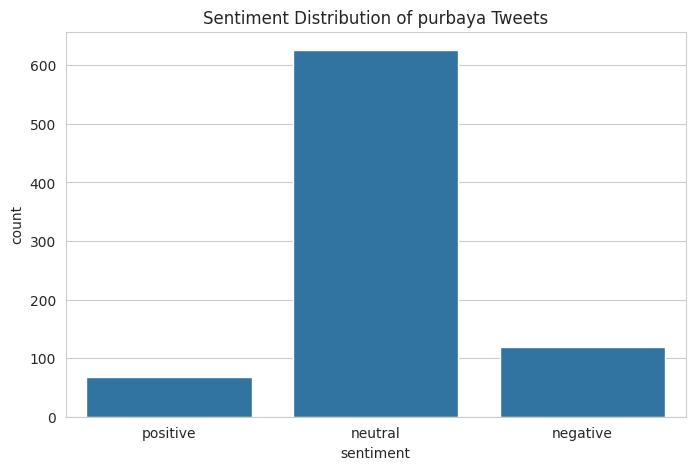

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
sns.countplot(data=df_sorted, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title('Sentiment Distribution of purbaya Tweets')

sentiment_counts = df_sorted['sentiment'].value_counts()
total = sentiment_counts.sum()

print(f"Positif: {sentiment_counts.get('positive', 0)} ({sentiment_counts.get('positive', 0)/total:.2%})")
print(f"Netral: {sentiment_counts.get('neutral', 0)} ({sentiment_counts.get('neutral', 8)/total:.2%})")
print(f"Negatif: {sentiment_counts.get('negative', 0)} ({sentiment_counts.get('negative', 8)/total:.2%})")
plt.show()

In [17]:
print("\nContoh Data Positif:")
print(df_sorted[df_sorted['sentiment'] == 'positive'] ['cleaned_text'].head(1).values[0])

print("\nContoh Data Negatif:")
print(df_sorted[df_sorted['sentiment'] == 'negative']['cleaned_text'].head(1).values[0])

print("\nContoh Data Netral:")
print(df_sorted[df_sorted['sentiment'] == 'neutral'] ['cleaned_text'].head(1).values[0])


Contoh Data Positif:
komunikasi publik seperti ini yang diperlukan knp negara ngutang knp gak ngutang hrs ada alasan yg bisa diterima publik dan yg penting lagi selau memberikan optimisme menkeu purbaya yakin utang negara tak akan bertambah terlalu besar

Contoh Data Negatif:
ada pesan tersembunyi dalam kata2 pak purbaya selama ini org kaya yg gak mau sibuk gak mau mikir g mau capek tapi tetap dapat income adalah dengan cara deposito pak purbaya tdk maubkrn roda ekonomi gak gerak pesan tersembunyi nya kalian org kaya pakai duit kalian buat

Contoh Data Netral:
gayus tambunan bongkar 5 modus permainan pajak 1 melakukan negosiasi surat ketetapan pajak skp negosiasi terjadi di tingkat tim pemeriksa pajak tujuannya untuk menaikkan atau menurunkan nilai pajak gtgtgt purbaya kejar 200 penunggak pajak senilai rp60t


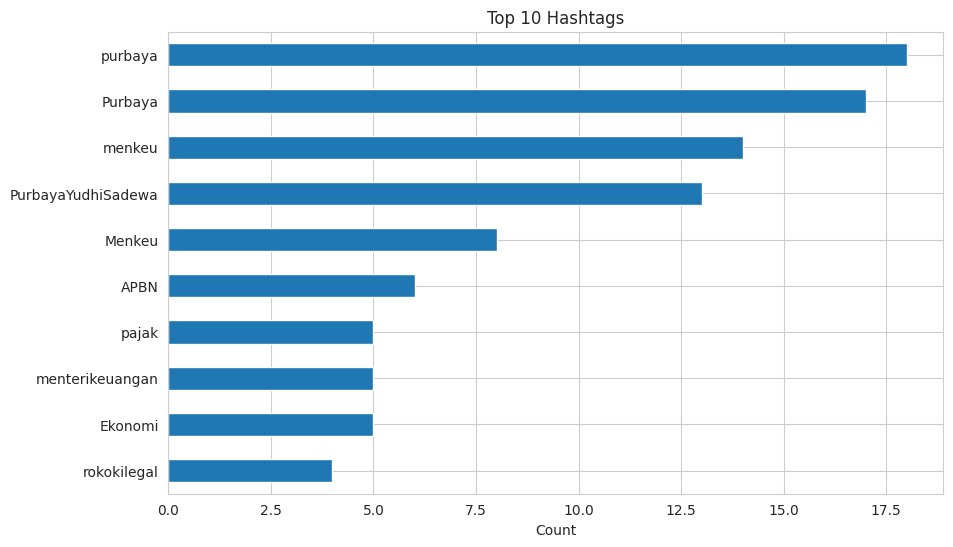

In [18]:
# Top hashtags
all_hashtags = [tag for sublist in df_sorted['hashtags'] for tag in sublist]
hashtag_counts = pd.Series(all_hashtags).value_counts().head(10)

# Check if hashtag_counts is empty before plotting
if not hashtag_counts.empty:
    plt.figure(figsize=(10, 6))
    hashtag_counts.plot(kind='barh')
    plt.title('Top 10 Hashtags')
    plt.xlabel('Count')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("No hashtags found to display the top 10.")

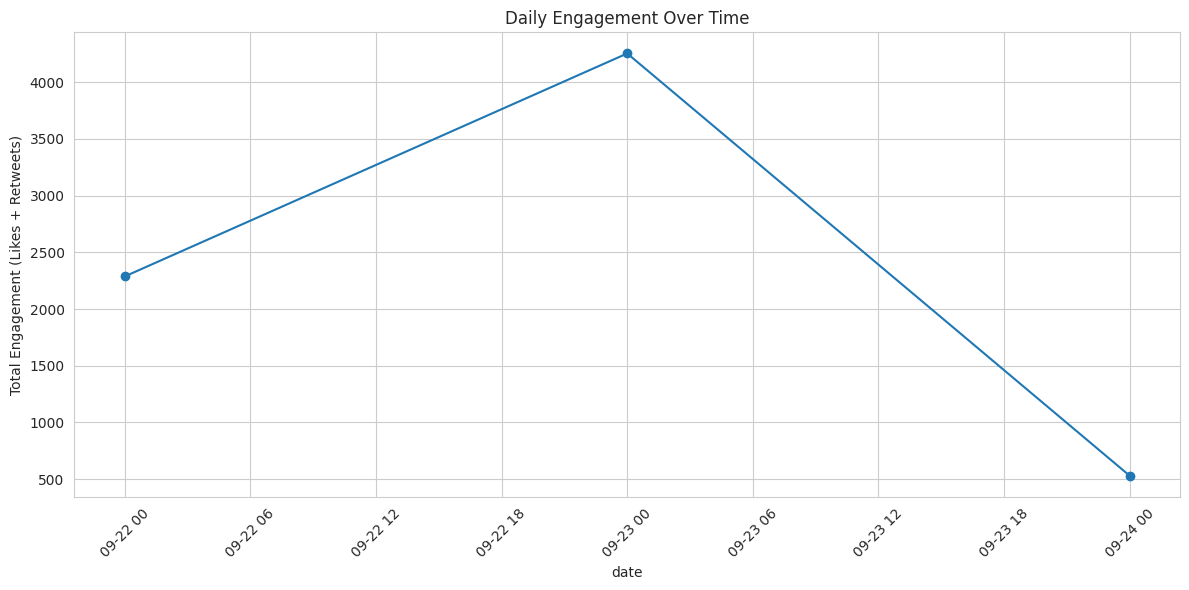

In [19]:
# Engagement over time
df_sorted['date'] = df_sorted['created_at'].dt.date
daily_engagement = df_sorted.groupby('date')['engagement'].sum()
plt.figure(figsize=(12, 6))
daily_engagement.plot(marker='o')
plt.title('Daily Engagement Over Time')
plt.ylabel('Total Engagement (Likes + Retweets)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


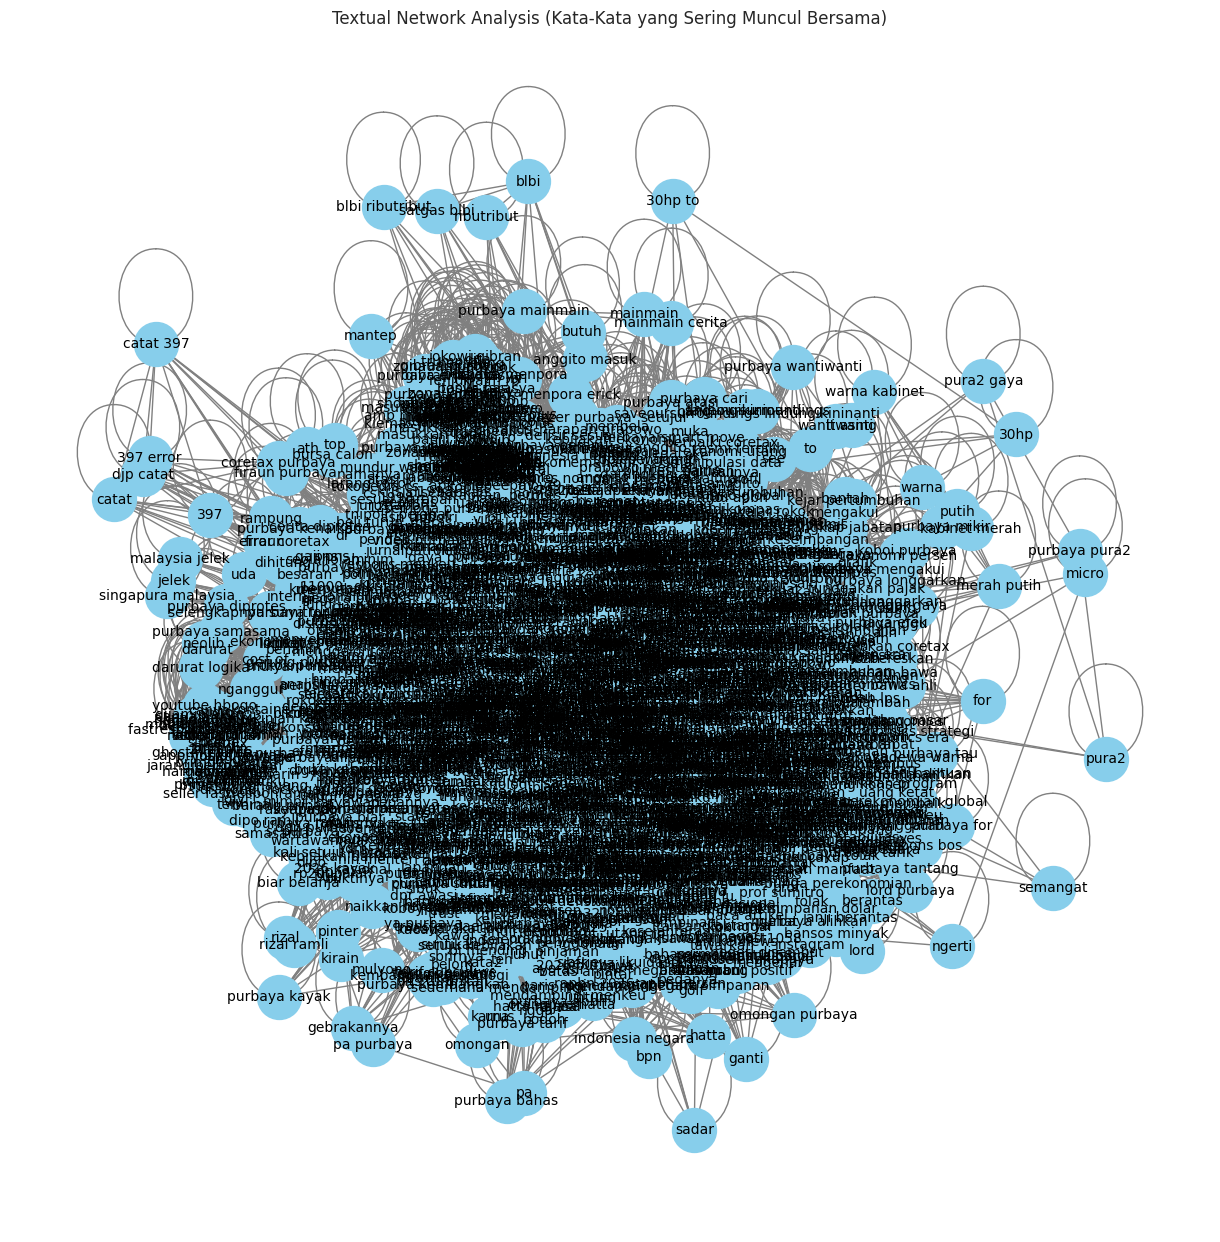

In [20]:
# Install required packages if necessary
!pip install --upgrade networkx scipy nltk scikit-learn

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

# Download stopwords Bahasa Indonesia
try:
    nltk.data.find('corpora/stopwords/indonesian')
except LookupError:
    nltk.download('stopwords')

# 1. Pastikan dataframe dan kolomnya tersedia
if 'df_sorted' in locals() and 'cleaned_text' in df_sorted.columns and not df_sorted['cleaned_text'].dropna().empty:
    texts = df_sorted['cleaned_text'].dropna().astype(str).tolist()

    # 2. Ambil stopwords Bahasa Indonesia
    indonesian_stop_words = stopwords.words('indonesian')

    # 3. Buat vectorizer n-gram 1 dan 2, min_df=2 supaya hanya yang sering muncul
    vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words=indonesian_stop_words, min_df=2)
    X = vectorizer.fit_transform(texts)
    features = vectorizer.get_feature_names_out()

    if X.shape[0] > 0 and X.shape[1] > 0:
        # 4. Matriks co-occurrence
        co_occurrence_matrix = (X.T @ X)
        co_occurrence_matrix.setdiag(0)

        # 5. Buat graph (GANTI ke from_scipy_sparse_array)
        G = nx.from_scipy_sparse_array(co_occurrence_matrix)
        labels = {i: word for i, word in enumerate(features)}
        G = nx.relabel_nodes(G, labels)

        if G.number_of_nodes() > 0:
            plt.figure(figsize=(12, 12))
            pos = nx.spring_layout(G, k=0.3, seed=42)
            nx.draw(
                G, pos,
                with_labels=True,
                node_color='skyblue',
                edge_color='gray',
                node_size=1000,
                font_size=10
            )
            plt.title("Textual Network Analysis (Kata-Kata yang Sering Muncul Bersama)")
            plt.show()
        else:
            print("Graph kosong.")
    else:
        print("Tidak ada kata yang cukup sering muncul untuk divisualisasikan.")
else:
    print("Dataframe 'df_sorted' tidak ditemukan atau kolom 'cleaned_text' kosong.")
